In [6]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use("arviz-darkgrid")


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


# Chapter 2 homework


## 2E1

Which of the expressions below correspond to the statement: *the probability of rain on Monday?*

- (1) Pr(rain)
- (2) Pr(rain|Monday)
- (3) Pr(Monday|rain)
- (4) Pr(rain, Monday)/ Pr(Monday)

**Answer**

Pr(rain|Monday)

## 2E2

Which of the following statements corresponds to the expression: 
*Pr(Monday|rain)?*

- (1) The probability of rain on Monday.
- (2) The probability of rain, given that it is Monday.
- (3) The probability that it is Monday, given that it is raining.
- (4) The probability that it is Monday and that it is raining.

**Answer**

(1) The probability of rain on Monday.



Which of the expressions below correspond to the statement: *the probability that it is Monday, given that it is raining?*
- (1) Pr(Monday|rain)
- (2) Pr(rain|Monday)
- (3) Pr(rain|Monday) Pr(Monday)
- (4) Pr(rain|Monday) Pr(Monday)/ Pr(rain)
- (5) Pr(Monday|rain) Pr(rain)/ Pr(Monday)

**Answer**

- (2) Pr(rain|Monday)
- (4) Pr(rain|Monday) Pr(Monday)/ Pr(rain)

## 2E4 

The Bayesian statistician Bruno de Finetti (1906–1985) began his book on probability theory
with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original, so
I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device
for describing uncertainty from the perspective of an observer with limited knowledge; it has no
objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What
does it mean to say “the probability of water is 0.7”?

**Answer**

Stating that some probability is 0.7 doesn't mean objectively true, it's just stating that with current knowledge we belief that this is the case. This belief can further change when we receive new data. Thus probability is not something that really exists.

## 2E5

Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.

- (1) W, W, W
- (2) W, W, W, L
- (3) L, W, W, L, W, W, W

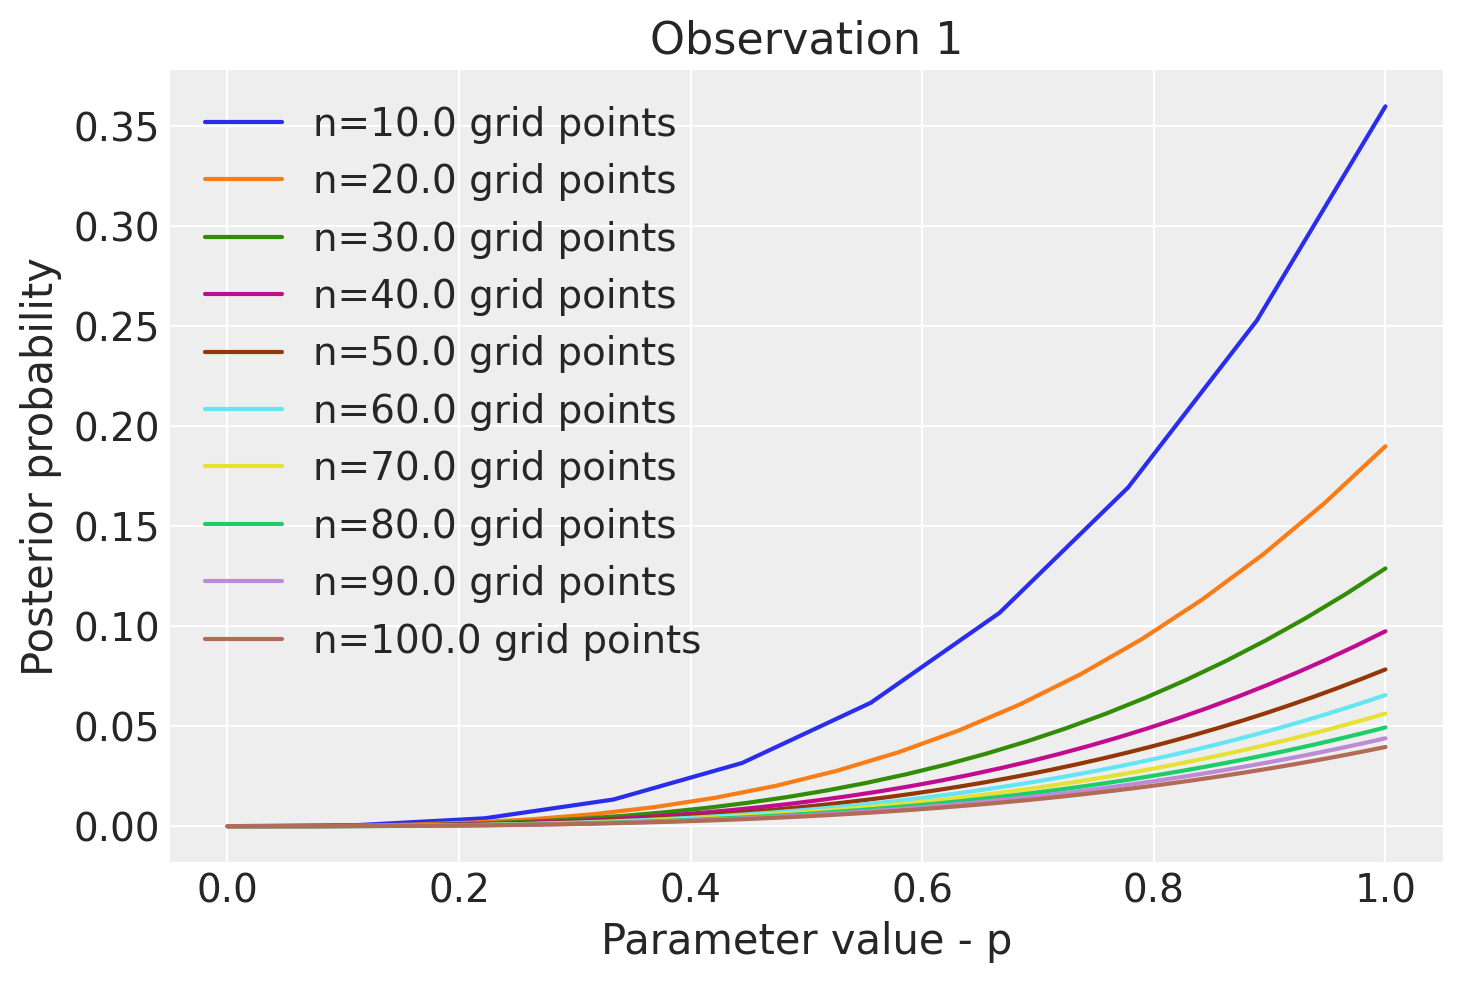

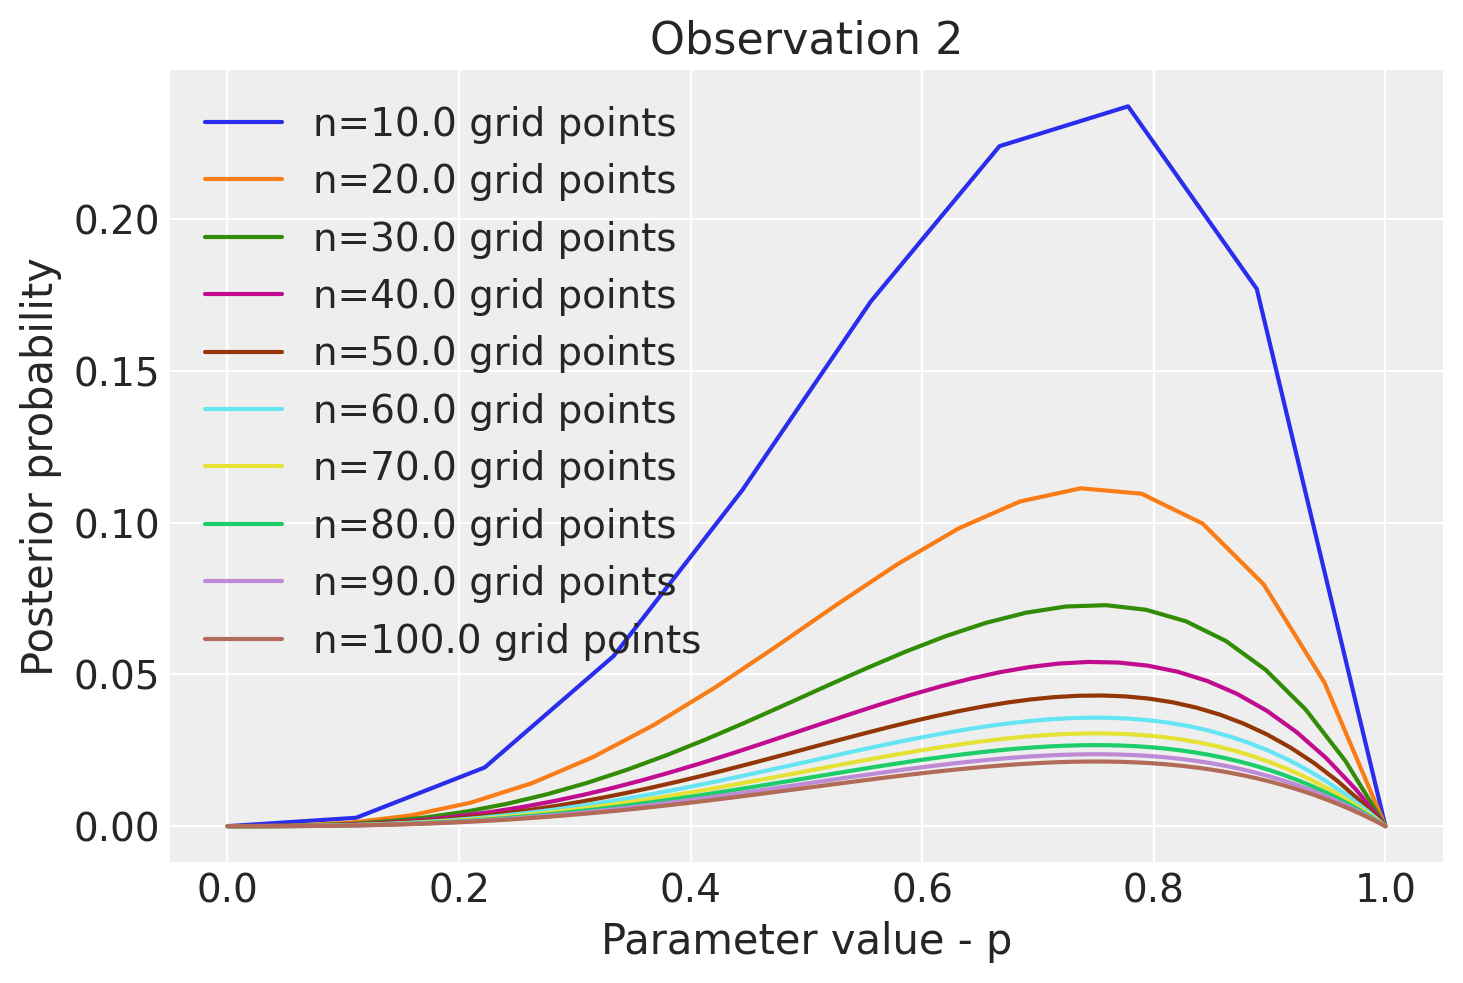

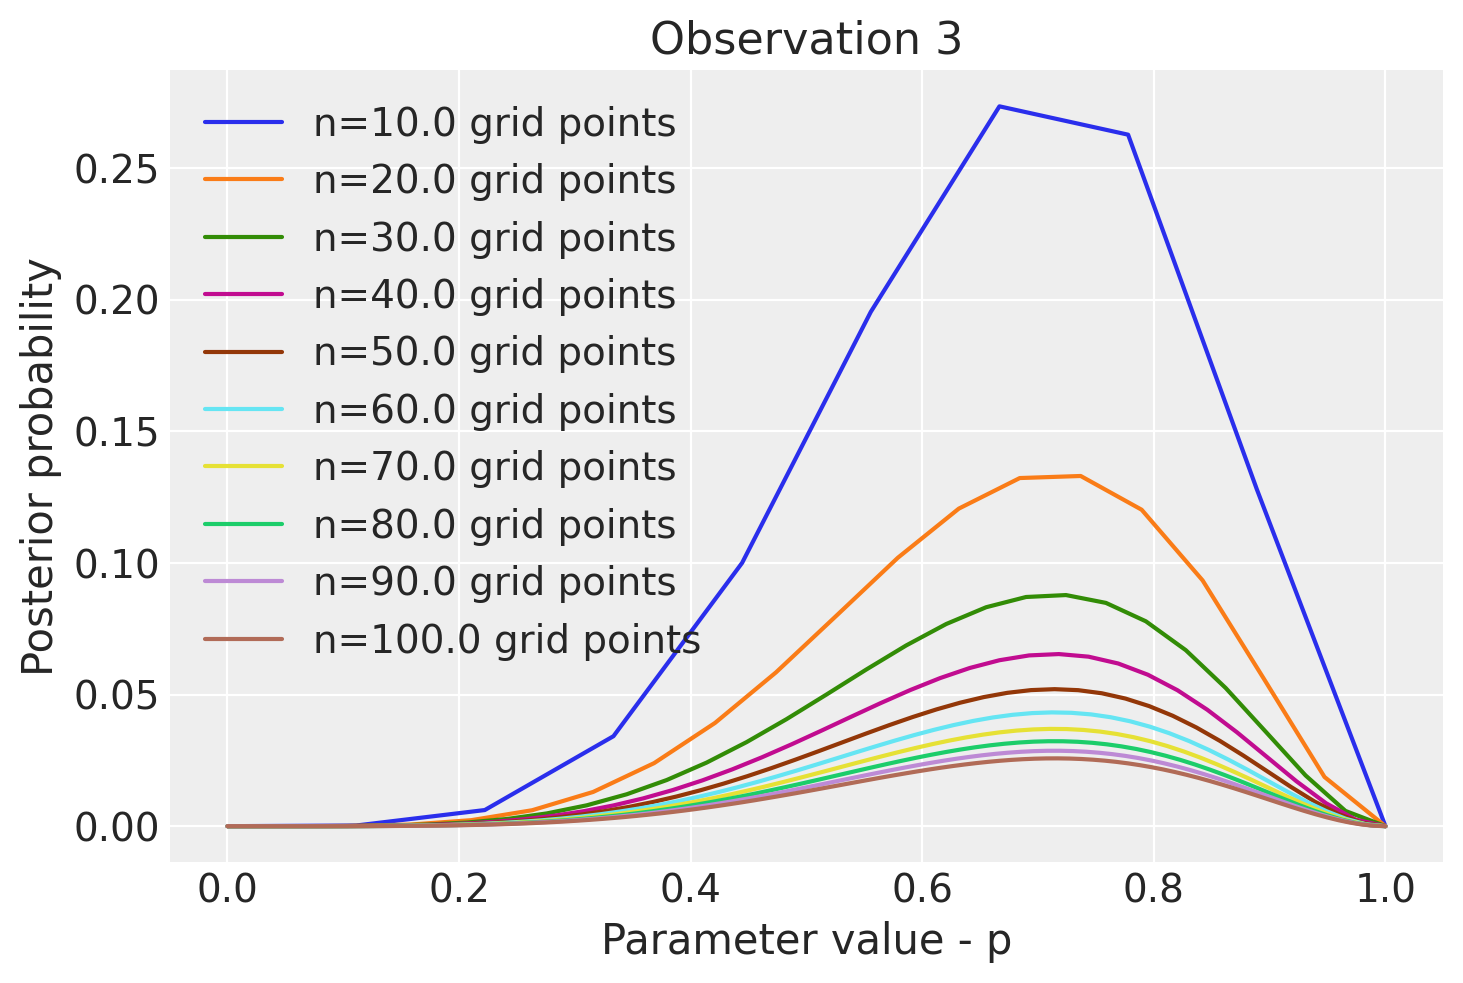

In [17]:
W = np.array([3, 3, 5])
Total = np.array([3, 4, 7])
for i, j, k in zip(W, Total, range(3)):
    plt.figure()
    for n in np.linspace(10, 100, 10):
        p = np.linspace(0, 1, int(n))
        likelihood = stats.binom.pmf(i, j, p)
        prior = 1
        posterior = likelihood * prior
        posterior = posterior / np.sum(posterior)
        plt.plot(p, posterior, label=f"n={n} grid points")

    plt.title(f"Observation {k + 1}")
    plt.xlabel("Parameter value - p")
    plt.ylabel("Posterior probability")
    plt.legend()
    plt.show()
